In [1]:
import sys
import torch
import os
HOME = os.getcwd()
print(f"Python version: {sys.version}, {sys.version_info} ")
print(f"Pytorch version: {torch.__version__} ")

Python version: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0], sys.version_info(major=3, minor=9, micro=16, releaselevel='final', serial=0) 
Pytorch version: 1.13.1+cu116 


## YOLO


In [2]:
!# Download YOLOv7 code
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!ls

Cloning into 'yolov7'...
remote: Enumerating objects: 1139, done.
remote: Total 1139 (delta 0), reused 0 (delta 0), pack-reused 1139
Receiving objects: 100% (1139/1139), 70.32 MiB | 29.78 MiB/s, done.
Resolving deltas: 100% (512/512), done.
/content/yolov7
cfg	detect.py  hubconf.py  models	  requirements.txt  tools	  utils
data	export.py  inference   paper	  scripts	    train_aux.py
deploy	figure	   LICENSE.md  README.md  test.py	    train.py


In [ ]:
!# Download trained weights
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

In [ ]:
!# Download transfare learning weights
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt

## Dataset and Train/predict

In [ ]:
#Custom data
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JY73BoJbExcYZK2pAjxc")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
dataset = project.version(4).download("yolov7")

In [ ]:
!python train.py --workers 8 --device 0 --batch-size 32 --epochs 500 --data football-players-detection-4/data.yaml --img 640 640 --cfg cfg/training/yolov7-tiny.yaml --weights 'yolov7_training.pt' --name yolov7-custom --hyp data/hyp.scratch.custom.yaml

In [ ]:
!python detect.py --weights runs/train/yolov7-custom/weights/best.pt --conf 0.1 --source test2.mp4	
# !ls

DEEPSORT


In [ ]:
!git clone https://github.com/nwojke/deep_sort.git

In [ ]:
python deep_sort_app.py \
    --sequence_dir=./... \
    --detection_file=./resources/detections/MOT16_POI_test/MOT16-06.npy \
    --min_confidence=0.3 \
    --nn_budget=100 \
    --display=True

## ByteTrack


## Downloads


In [3]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
!cd ByteTrack && pip3 install -r requirements.txt
!cd ByteTrack && python3 setup.py develop
!pip install cython_bbox

/content
Cloning into 'ByteTrack'...
remote: Enumerating objects: 2007, done.
remote: Total 2007 (delta 0), reused 0 (delta 0), pack-reused 2007
Receiving objects: 100% (2007/2007), 79.60 MiB | 11.58 MiB/s, done.
Resolving deltas: 100% (1141/1141), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 36.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 KB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 43.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... 

In [4]:
import sys
sys.path.append(f"{HOME}/ByteTrack")

In [5]:
!pip install onemetric --quiet
!pip install loguru
!pip install thop
!pip install lap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 6.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached loguru-0.6.0-py3-none-any.whl (58 kB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached lap-0.4.0-cp39-cp39-linux_x86_64.whl


In [ ]:
#try to setup bytetracker


## SetupByterack

In [9]:
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

In [10]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch

TODO


In [26]:
from __future__ import annotations
from dataclasses import dataclass, field
from typing import Tuple, Optional, List, Dict, Any

import cv2
import numpy as np

@dataclass(frozen=True)
class Point:
    """
    Represents a point in a 2D coordinate system with x and y coordinates.
    @dataclass(frozen=True): This decorator marks the class as a data class and makes it immutable. 
    This means that once an instance of this class is created, its attributes cannot be modified.
    Attributes:
        x (float): The x-coordinate of the point.
        y (float): The y-coordinate of the point.
    """
    x: float
    y: float
    
    @property
    def int_xy_tuple(self) -> Tuple[int, int]:
        return int(self.x), int(self.y)

@dataclass(frozen=True)
class Rect:
    """
    Represents a rectangular region in a 2D coordinate system with x, y, width, and height attributes.
    Attributes:
        x (float): The x-coordinate of the top-left corner of the rectangle.
        y (float): The y-coordinate of the top-left corner of the rectangle.
        width (float): The width of the rectangle.
        height (float): The height of the rectangle.
    """
    x: float
    y: float
    width: float
    height: float
    
    @property
    def min_x(self) -> float:
      """
      Property is a setter,getter,delete
      """
      return self.x
    
    @property
    def min_y(self) -> float:
      return self.y
    
    @property
    def max_x(self) -> float:
      return self.x + self.width
    
    @property
    def max_y(self) -> float:
      return self.y + self.height
        
    @property
    def top_left(self) -> Point:
      return Point(x=self.x, y=self.y)
    
    @property
    def bottom_right(self) -> Point:
      return Point(x=self.x + self.width, y=self.y + self.height)

    @property
    def bottom_center(self) -> Point:
      return Point(x=self.x + self.width / 2, y=self.y + self.height)

    @property
    def top_center(self) -> Point:
      return Point(x=self.x + self.width / 2, y=self.y)

    @property
    def center(self) -> Point:
      return Point(x=self.x + self.width / 2, y=self.y + self.height / 2)

    def pad(self, padding: float) -> Rect:
      """
      Returns a new rectangle padded by the given amount.
      """
      return Rect(
        x=self.x - padding, 
        y=self.y - padding,
        width=self.width + 2*padding,
        height=self.height + 2*padding
        )
  
    def contains_point(self, point: Point) -> bool:
      return self.min_x < point.x < self.max_x and self.min_y < point.y < self.max_y

In [27]:
@dataclass
class Detection:
    """
    A dataclass representing a detection with its bounding box rectangle, class ID, class name, 
    confidence, and an optional tracker ID.
    """
    rect: Rect
    class_id: int
    class_name: str
    confidence: float
    tracker_id: Optional[int] = None
    
    @classmethod
    def from_results(cls, pred: np.ndarray, names: Dict[int, str]) -> List[Detection]:
        """
        Create a list of Detection objects from the results of a prediction.
        Args:
            pred (numpy.ndarray): An ndarray of shape `(N, 6)` containing predictions.
                Each row of the ndarray contains the `x_min`, `y_min`, `x_max`, `y_max`, `confidence`, and `class_id`
                of a single detection.
            names (dict): A dictionary that maps class IDs to class names.
        
        Returns:
            A list of Detection objects.
        """
        result = []
        for x_min, y_min, x_max, y_max, confidence, class_id in pred:
            class_id=int(class_id)
            result.append(Detection(
                rect=Rect(
                    x=float(x_min),
                    y=float(y_min),
                    width=float(x_max - x_min),
                    height=float(y_max - y_min)
                ),
                class_id=class_id,
                class_name=names[class_id],
                confidence=float(confidence)
            ))
        return result

def filter_detections_by_class(detections: List[Detection], class_name: str) -> List[Detection]:
    return [
        detection for detection in detections if detection.class_name == class_name
    ]

In [ ]:
@dataclass(frozen=True)
class Color:
    r: int
    g: int
    b: int
        
    @property
    def bgr_tuple(self) -> Tuple[int, int, int]:
        return self.b, self.g, self.r

    @classmethod
    def from_hex_string(cls, hex_string: str) -> Color:
        r, g, b = tuple(int(hex_string[1 + i:1 + i + 2], 16) for i in (0, 2, 4))
        return Color(r=r, g=g, b=b)


In [ ]:
def draw_rect(image: np.ndarray, rect: Rect, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.rectangle(image, rect.top_left.int_xy_tuple, rect.bottom_right.int_xy_tuple, color.bgr_tuple, thickness)
    return image


def draw_filled_rect(image: np.ndarray, rect: Rect, color: Color) -> np.ndarray:
    cv2.rectangle(image, rect.top_left.int_xy_tuple, rect.bottom_right.int_xy_tuple, color.bgr_tuple, -1)
    return image


def draw_polygon(image: np.ndarray, countour: np.ndarray, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.drawContours(image, [countour], 0, color.bgr_tuple, thickness)
    return image


def draw_filled_polygon(image: np.ndarray, countour: np.ndarray, color: Color) -> np.ndarray:
    cv2.drawContours(image, [countour], 0, color.bgr_tuple, -1)
    return image


def draw_text(image: np.ndarray, anchor: Point, text: str, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.putText(image, text, anchor.int_xy_tuple, cv2.FONT_HERSHEY_SIMPLEX, 0.7, color.bgr_tuple, thickness, 2, False)
    return image


def draw_ellipse(image: np.ndarray, rect: Rect, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.ellipse(
        image,
        center=rect.bottom_center.int_xy_tuple,
        axes=(int(rect.width), int(0.35 * rect.width)),
        angle=0.0,
        startAngle=-45,
        endAngle=235,
        color=color.bgr_tuple,
        thickness=thickness,
        lineType=cv2.LINE_4
    )
    return image


In [ ]:
@dataclass
class BaseAnnotator:
  colors: List[Color]
  thickness: int

  def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
    annotated_image = image.copy()
    for detection in detections:
      annotated_image = draw_rect(
          image=image,
          rect=detection.rect,
          color=self.colors[detection.class_id],
          thickness=self.thickness
      )
    return annotated_image

In [ ]:
# white
BALL_COLOR_HEX = "#FFFFFF"
BALL_COLOR = Color.from_hex_string(BALL_COLOR_HEX)

# red
GOALKEEPER_COLOR_HEX = "#850101"
GOALKEEPER_COLOR = Color.from_hex_string(GOALKEEPER_COLOR_HEX)

# green
PLAYER_COLOR_HEX = "#00D4BB"
PLAYER_COLOR = Color.from_hex_string(PLAYER_COLOR_HEX)

# yellow
REFEREE_COLOR_HEX = "#FFFF00"
REFEREE_COLOR = Color.from_hex_string(REFEREE_COLOR_HEX)

COLORS = [
    BALL_COLOR,
    GOALKEEPER_COLOR,
    PLAYER_COLOR,
    REFEREE_COLOR
]
THICKNESS = 4

## Show results

In [12]:
from typing import Generator

import matplotlib.pyplot as plt
import numpy as np

import cv2
def generate_frames(video_file: str) -> Generator[np.ndarray, None, None]:
    video = cv2.VideoCapture(video_file)

    while video.isOpened():
        success, frame = video.read()

        if not success:
            break

        yield frame

    video.release()


In [6]:
!ls

ByteTrack  sample_data	yolov7


In [8]:
weights_path = './best.pt'
model = torch.hub.load('WongKinYiu/yolov7', 'custom', weights_path, force_reload=True, trust_repo=True)


Downloading: "https://github.com/WongKinYiu/yolov7/zipball/main" to /root/.cache/torch/hub/main.zip


requirements: jedi>=0.10 not found and is required by YOLOR, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.5 MB/s eta 0:00:00

requirements: 1 package updated per /root/.cache/torch/hub/WongKinYiu_yolov7_main/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Adding autoShape... 


In [ ]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-3-27 Python-3.9.16 torch-1.13.1+cu116 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
# get fresh video frame generator
frame_iterator = iter(generate_frames(video_file="test2_init.mp4"))

In [ ]:
import matplotlib.pyplot as plt
def plot_image(image: np.ndarray, size: int = 12) -> None:
  plt.figure(figsize=(size, size))
  plt.imshow(image[...,::-1])
  plt.show()

In [ ]:
# initiate annotators
annotator = BaseAnnotator(
    colors=COLORS, 
    thickness=THICKNESS)

# acquire video frame
frame = next(frame_iterator)

# run detector
results = model(frame, size=1280)
detections = Detection.from_results(
    pred=results.pred[0].cpu().numpy(), 
    names=model.names)

# annotate video frame
annotated_image = annotator.annotate(
    image=frame, 
    detections=detections)

# plot video frame
plot_image(annotated_image, 16)

In [ ]:
plt.imshow(annotated_image)
plt.show()

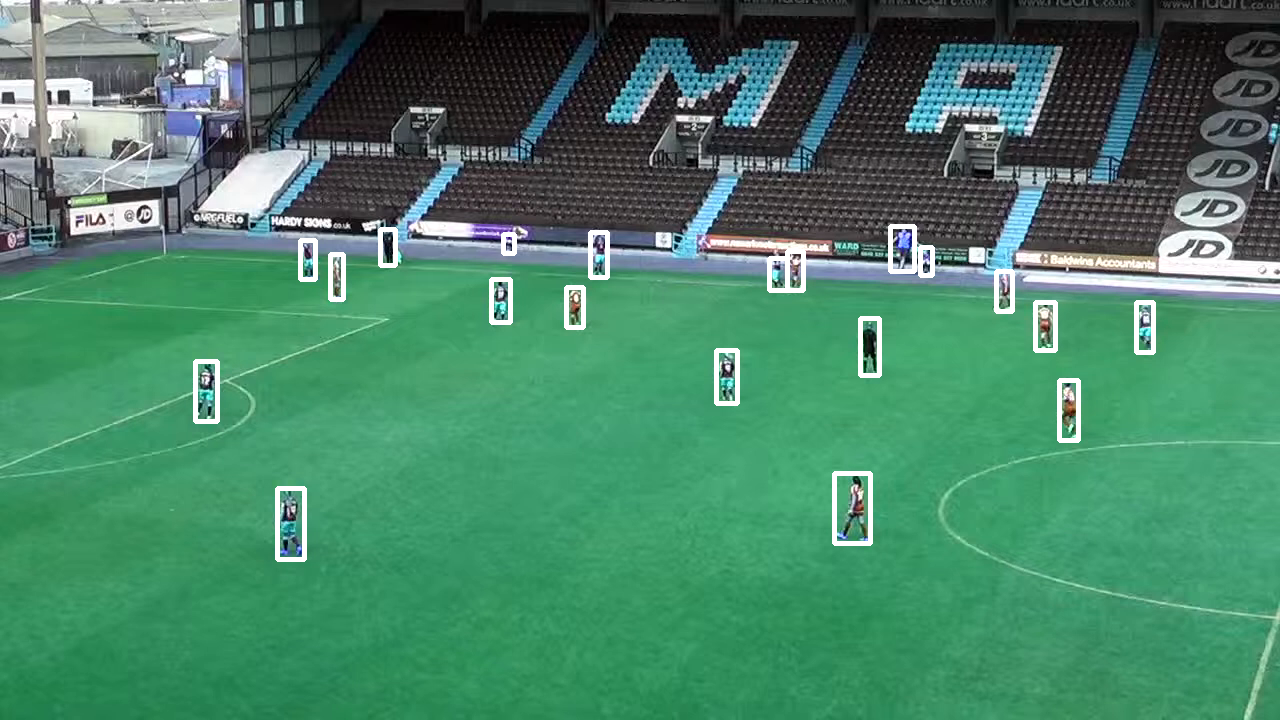

In [ ]:
from PIL import Image
img = Image.fromarray(annotated_image)

# show the image
img.show()

MyTest


In [32]:
from typing import List
def detections2boxes(detections: List[Detection], with_confidence: bool = True) -> np.ndarray:
    return np.array([
        [
            detection.rect.top_left.x, 
            detection.rect.top_left.y,
            detection.rect.bottom_right.x,
            detection.rect.bottom_right.y,
            detection.confidence
        ] if with_confidence else [
            detection.rect.top_left.x, 
            detection.rect.top_left.y,
            detection.rect.bottom_right.x,
            detection.rect.bottom_right.y
        ]
        for detection
        in detections
    ], dtype=float)
# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: List[Detection], 
    tracks: List[STrack]
) -> List[Detection]:
    detection_boxes = detections2boxes(detections=detections, with_confidence=False)
    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detection_boxes)
    track2detection = np.argmax(iou, axis=1)
    
    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            detections[detection_index].tracker_id = tracks[tracker_index].track_id
    return detections

In [60]:
from tqdm.notebook import tqdm
!ls
frame_iterator = iter(generate_frames(video_file="test2_init.mp4"))
# byte_tracker = BYTETracker(BYTETrackerArgs())
for frame in tqdm(frame_iterator):
  results = model(frame)
  print(results)

best.pt  ByteTrack  sample_data  test2_init.mp4  yolov7


0it [00:00, ?it/s]

In [70]:
from tqdm.notebook import tqdm
frame_iterator = iter(generate_frames(video_file="test2_init.mp4"))
byte_tracker = BYTETracker(BYTETrackerArgs())

def conv(detections: List[Detection]) -> List[Detection]:
    return [detection for detection in detections]

def draw_rect(image: np.ndarray, rect: Rect, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.rectangle(image, rect.top_left.int_xy_tuple, rect.bottom_right.int_xy_tuple, color, thickness)
    return image

def draw_ellipse(image: np.ndarray, rect: Rect, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.ellipse(
        image,
        center=rect.bottom_center.int_xy_tuple,
        axes=(int(rect.width), int(0.35 * rect.width)),
        angle=0.0,
        startAngle=-45,
        endAngle=235,
        color=color,
        thickness=thickness,
        lineType=cv2.LINE_4
    )
    return image


def annotate(image: np.ndarray, detections: List[Detection]) -> np.ndarray:
  annotated_image = image.copy()
  for detection in detections:
      annotated_image = draw_ellipse(
          image=image,
          rect=detection.rect,
          color=(100,100,100),
      )
  return annotated_image


@dataclass(frozen=True)
class VideoConfig:
    fps: float
    width: int
    height: int

def get_video_writer(target_video_path: str, video_config: VideoConfig) -> cv2.VideoWriter:
    video_target_dir = os.path.dirname(os.path.abspath(target_video_path))
    os.makedirs(video_target_dir, exist_ok=True)
    return cv2.VideoWriter(
        target_video_path, 
        fourcc=cv2.VideoWriter_fourcc(*"mp4v"), 
        fps=video_config.fps, 
        frameSize=(video_config.width, video_config.height), 
        isColor=True
    )

video_config = VideoConfig(
    fps=25, 
    width=1280, 
    height=720)
video_writer = get_video_writer(
    target_video_path="cica.mp4", 
    video_config=video_config)

for frame in tqdm(frame_iterator):
  results = model(frame)

  detections = Detection.from_results(
        pred=results.pred[0].cpu().numpy(), 
        names=model.names)

  tracks = byte_tracker.update(
      output_results=detections2boxes(detections), #detections2boxes(detections=),
      img_info=frame.shape,
      img_size=frame.shape
  )

  tracked_detections = match_detections_with_tracks(detections=detections, tracks=tracks)

  annotated_image = frame.copy()
  annotated_image = annotate(image=annotated_image, detections=tracked_detections)
  video_writer.write(annotated_image)
video_writer.release()

  



  #  tracks = byte_tracker.update(
  #       output_results=detections2boxes(detections=tracked_detections),
  #       img_info=frame.shape,
  #       img_size=frame.shape
  #   )

0it [00:00, ?it/s]